<a href="https://colab.research.google.com/github/RafsanJany-44/Thesis_Project/blob/main/Feature_Selection_S_W.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/krishnaik06/Feature-Selection-techniques/blob/master/Feature%20Selection.ipynb

https://www.youtube.com/watch?v=EqLBAmtKMnQ

In [19]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = pd.read_csv("/content/S_W.csv")
X = data.iloc[:,1:76] #independent columns
y = data[['Sleep Stage']]   #target column 

In [20]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

In [21]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [22]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [23]:
featureScores

,Specs,Score
0,MeanP_Alpha_F4,72.504622
1,MedianF_Alpha_F4,957.993488
2,MeanF_Alpha_F4,6863.309690
3,Spectral Edge_Alpha_F4,8325.573715
4,PeakF_Alpha_F4,109.537946
...,...,...
70,MeanP_Gamma_O2,2.096915
71,MedianF_Gamma_O2,17.110947
72,MeanF_Gamma_O2,0.007500
73,Spectral Edge_Gamma_O2,903.553668


In [24]:
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                     Specs         Score
8    Spectral Edge_Beta_F4  11373.488527
6          MedianF_Beta_F4   9190.314853
33   Spectral Edge_Beta_C4   8672.075254
3   Spectral Edge_Alpha_F4   8325.573715
59           PeakF_Beta_O2   7897.908333
2           MeanF_Alpha_F4   6863.309690
28  Spectral Edge_Alpha_C4   5610.763284
7            MeanF_Beta_F4   5432.923221
31         MedianF_Beta_C4   4356.787096
27          MeanF_Alpha_C4   4317.518029


In [25]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(featureScores.nlargest(10,'Score'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


                     Specs         Score
8    Spectral Edge_Beta_F4  11373.488527
6          MedianF_Beta_F4   9190.314853
33   Spectral Edge_Beta_C4   8672.075254
3   Spectral Edge_Alpha_F4   8325.573715
59           PeakF_Beta_O2   7897.908333
2           MeanF_Alpha_F4   6863.309690
28  Spectral Edge_Alpha_C4   5610.763284
7            MeanF_Beta_F4   5432.923221
31         MedianF_Beta_C4   4356.787096
27          MeanF_Alpha_C4   4317.518029


In [26]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.0083854  0.00833898 0.0208785  0.01667494 0.0065061  0.01108967
 0.02108984 0.02328767 0.01605927 0.01189367 0.00776631 0.03374586
 0.0102177  0.00824359 0.01538494 0.00735236 0.00837998 0.03237937
 0.01733682 0.00524532 0.00911149 0.015255   0.01030775 0.01327415
 0.00836824 0.00723324 0.00787873 0.01402596 0.01715253 0.00615003
 0.00734397 0.01249161 0.0147386  0.01652628 0.01085124 0.00706321
 0.05393917 0.01059788 0.01173876 0.02010538 0.00662069 0.00787202
 0.02668536 0.01914132 0.0049124  0.00638165 0.0112788  0.00886464
 0.01172208 0.00707984 0.00951569 0.01145327 0.01392411 0.01403903
 0.00714084 0.00891946 0.01240098 0.01005177 0.01021428 0.01055508
 0.0076243  0.04775728 0.0120598  0.01408109 0.02351481 0.00702581
 0.00675098 0.03669545 0.01798734 0.00621333 0.00681344 0.00840098
 0.00768099 0.00764779 0.0065638 ]


In [ ]:
#plot graph of feature importances for better visualization
#feat_importances = pd.Series(model.feature_importances_, index=X.columns)
#feat_importances.nlargest(10).plot(figsize=(20,10),kind="bar")
#plt.show()
#print(featureScores.nlargest(10,'Score'))

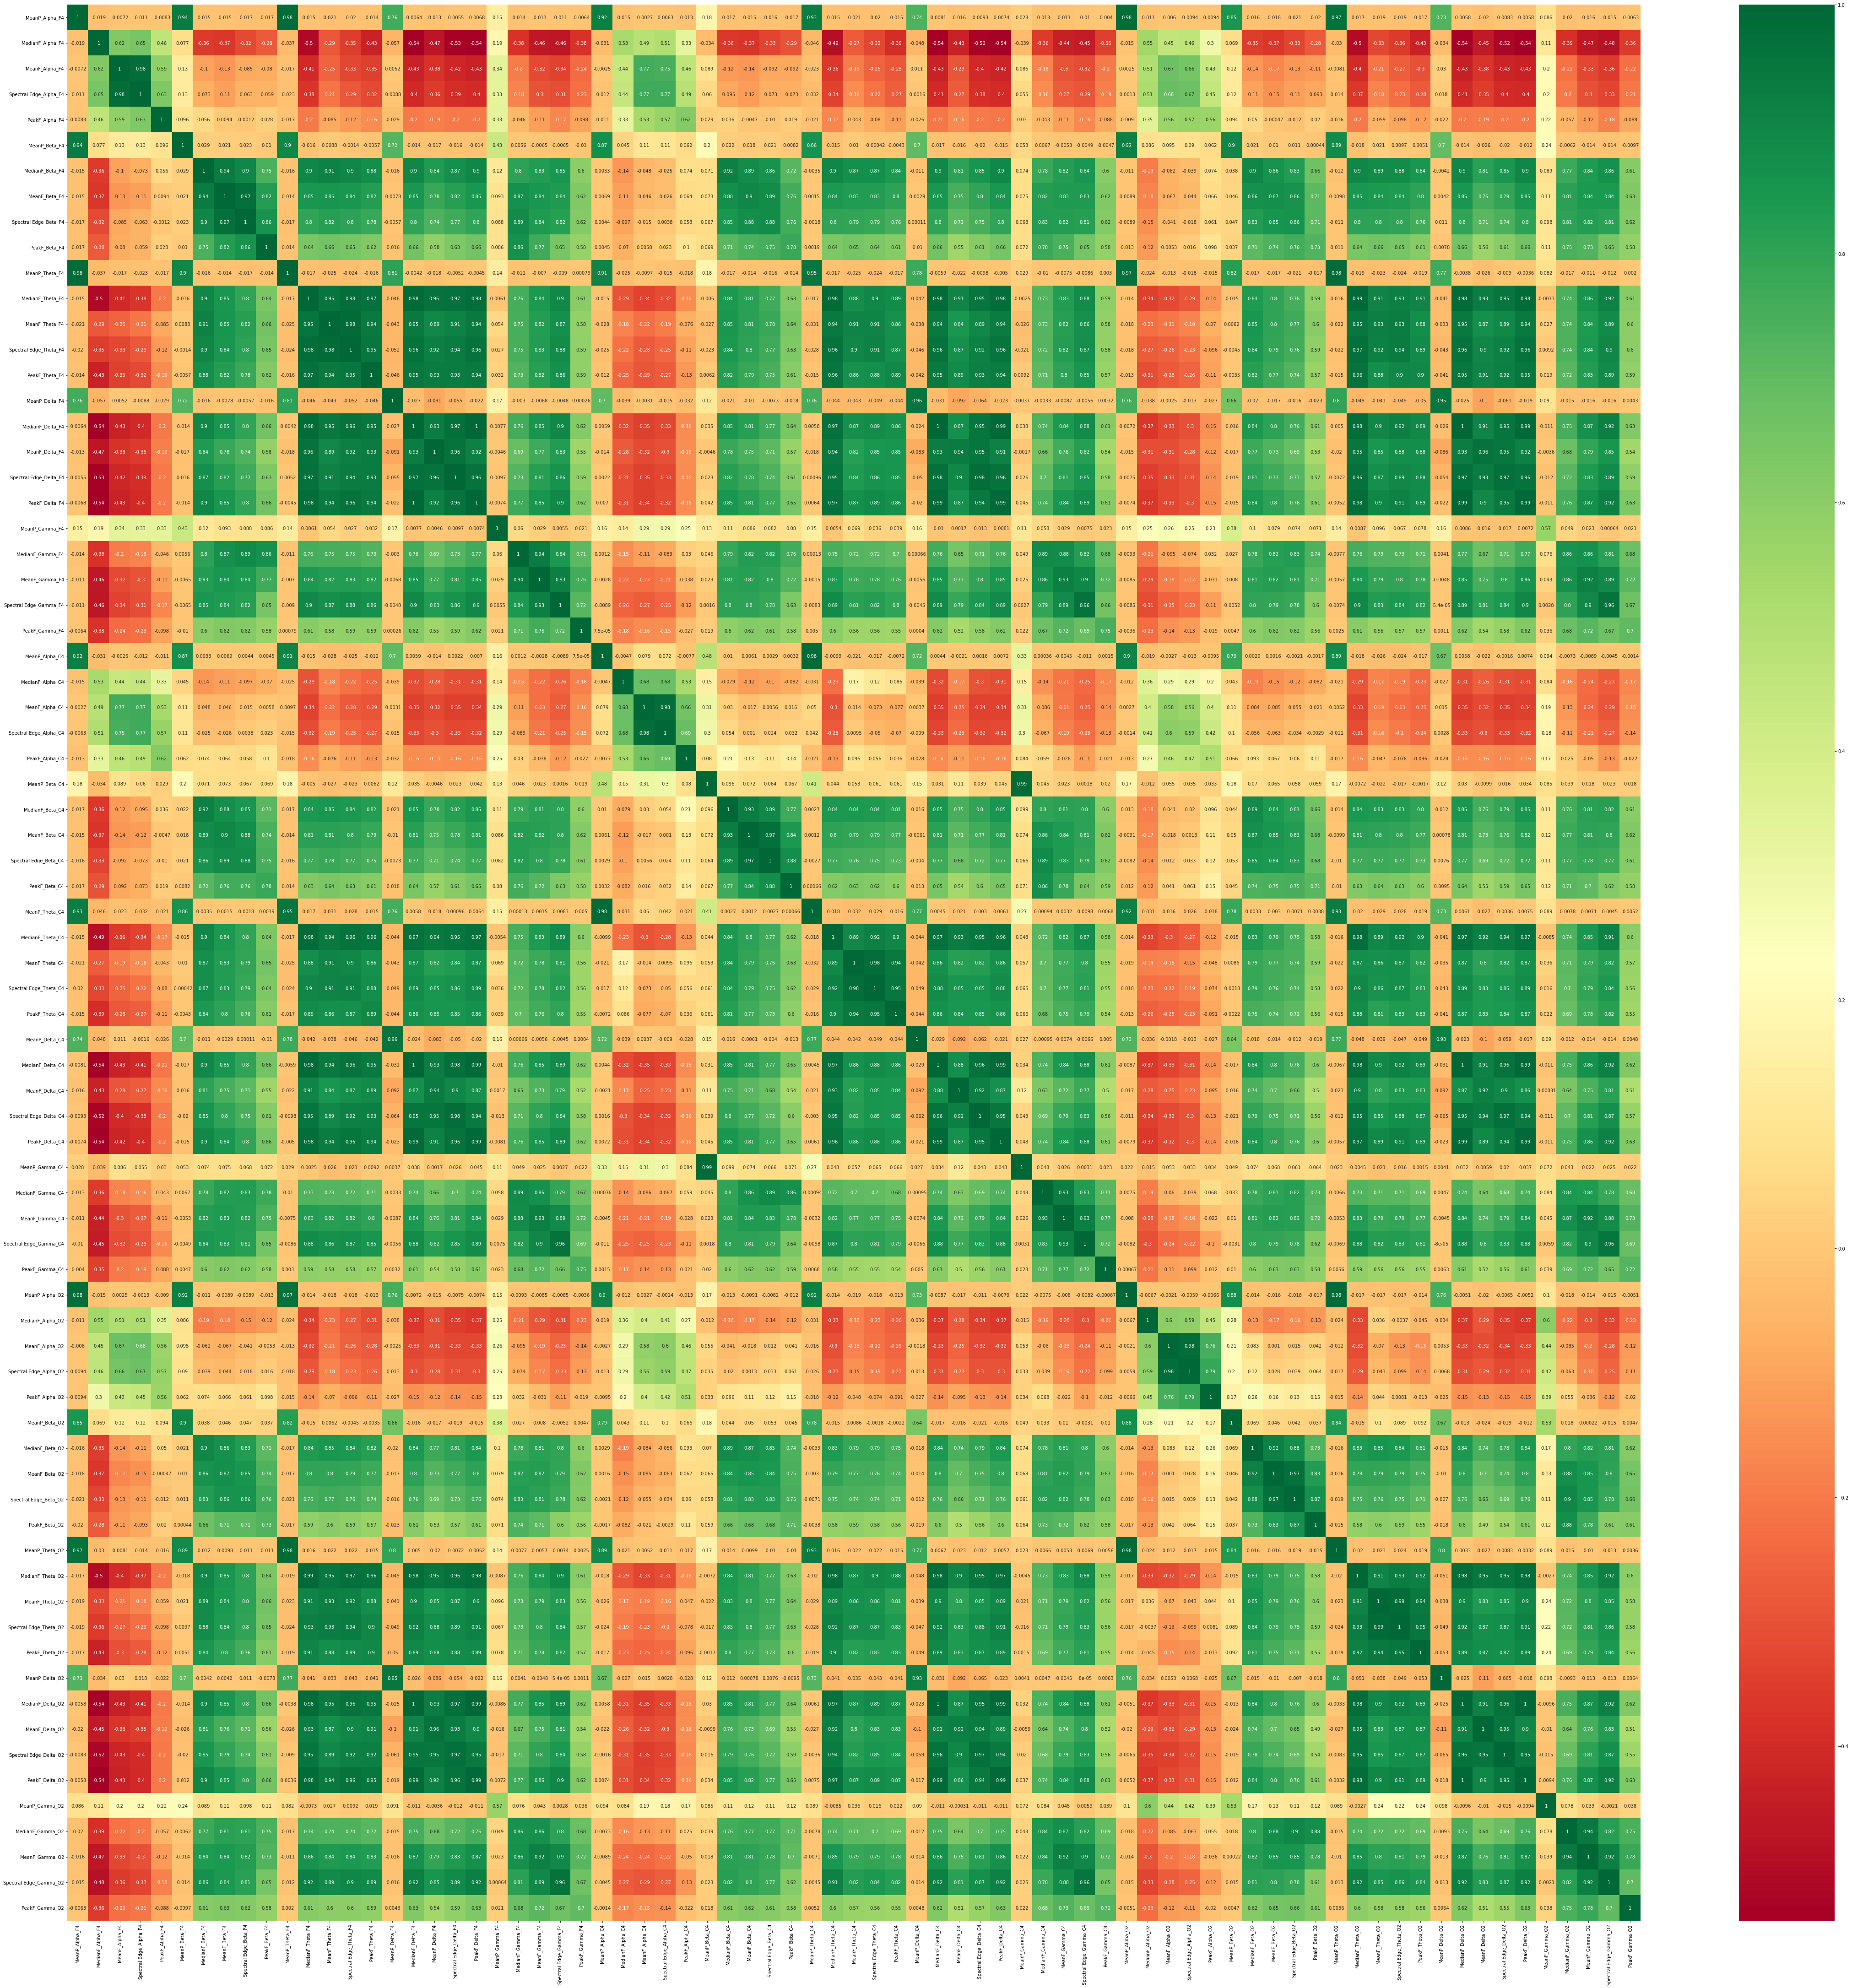

In [27]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(77,77))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

corr() is from panda and works on:
Method of correlation:

pearson : standard correlation coefficient

kendall : Kendall Tau correlation coefficient

spearman : Spearman rank correlation